## Data Science Project on "hello_world" Dataset

This Jupyter Notebook contains a data science project that focuses on analyzing and visualizing the "hello_world" dataset. The dataset is loaded into a Pandas DataFrame, and various preprocessing and visualization techniques are applied to gain insights from the data. The project is documented below:


### 1. Importing Libraries
In this section, the necessary libraries are imported, including numpy, pandas, matplotlib, seaborn, and joblib. These libraries are commonly used in data science projects for data manipulation, visualization, and analysis.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import joblib
!pip install matplotlib --upgrade
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 2. Mounting Google Drive
Google Drive is mounted to access the dataset and save the cleaned data and generated visualizations.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Loading the Dataset
The "hello_dataSet.csv" file is loaded into a Pandas DataFrame named `data`. This dataset contains information about students.


In [23]:
data= pd.read_csv('/content/drive/MyDrive/files/hello_dataset.csv')

### 4. Cleaning the Data
The data cleaning process involves several steps:
- Converting the "Name" column to uppercase.
- Converting the "Gender" column to lowercase.
- Converting the "FavoriteColor" and "BirthMonth" columns to lowercase.
- Initializing regular expressions for further cleaning steps.
- Replacing specific values in the "BirthMonth" column to correct misspellings.
- Extracting relevant information using regular expressions from columns such as "HSSC-1", "HSSC-2", "CGPA", "FavoriteColor", "BirthMonth", and "Weight".
- Converting extracted values to appropriate data types.
- Replacing empty values in the "BirthMonth" column with the most common value.
- Replacing missing values in numeric columns with the mode value.

In [24]:
data['Name']= data['Name'].str.upper()
data['Gender']= data['Gender'].str.lower()
data['FavoriteColor']= data['FavoriteColor'].str.lower()
data['BirthMonth']= data['BirthMonth'].str.lower()

In [25]:
r_part = r'^(\d{3})'
r_cgpa = r'^([0-9]*\.*[0-9]*)$'
r_color = r'^([a-z]*)'
r_month =r'^([a-z]*)'
r_weight=r'^(\d+\.*\d*)'

In [26]:
data['BirthMonth']=data['BirthMonth'].replace('feburary','february')
data['BirthMonth']=data['BirthMonth'].replace('sep','september')

In [27]:
part1 = data['HSSC-1'].str.extract(r_part, expand=False)
part2 = data['HSSC-2'].str.extract(r_part, expand=False)
cgpa = data['CGPA'].str.extract(r_cgpa, expand=False)
color = data['FavoriteColor'].str.extract(r_color, expand=False)
month = data['BirthMonth'].str.extract(r_month, expand=False)
weight = data['Weight'].str.extract(r_weight, expand=False)

In [28]:
data['HSSC-1'] = pd.to_numeric(part1)
data['HSSC-2'] = pd.to_numeric(part2)
data['CGPA'] = pd.to_numeric(cgpa)
data['FavoriteColor']= color
data['BirthMonth']= month
data['Weight'] = pd.to_numeric(weight)

In [29]:
data['BirthMonth']=data['BirthMonth'].replace('',value=data['BirthMonth'].mode()[0])

In [30]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newData_numerics = data.select_dtypes(include=numerics)
for x in newData_numerics:
    data[x].replace([np.nan],data[x].mode()[0],inplace=True)

In [31]:
data['HSSC-1'] = data['HSSC-1'].apply(np.int64)

### 5. Saving the Cleaned Dataset
The cleaned dataset is saved as "cleanedHelloWorldData.csv" in the specified directory.

In [32]:
data.to_csv('/content/drive/MyDrive/files/cleanedHelloWorldData.csv')


### 6. Analyzing the Data
Several analyses and visualizations are performed on the cleaned dataset:


#### a. List of Students with Names Starting with 'H'
The code extracts the names of students whose first name starts with the letter 'H' and prints the list.

In [33]:
r_1 = r'^(H+[A-Z]*\s*[A-Z]*\s*[A-Z]*\s*[A-Z]*)'
stu1 = data['Name'].str.extract(r_1,expand=False)
stu1.isnull().values
list_1 = [x for x in stu1 if str(x) != 'nan']
list_1

['HAMZA NAVEED',
 'HABIB ULLAH',
 'HUNAIN JAVED',
 'HAFIZ MALAHIM LABIB',
 'HAMNA TARIQ SALEEMI',
 'HINA',
 'HAMZA JAVED KHAN',
 'HUSNAIN AHMED ',
 'HAMAYOUN MASROOR',
 'HUSSAIN AFZAL']

#### b. Total Number of Students with Three-Word Names
The code extracts the names of students with a three-word name (first name, middle name, and surname) and calculates the total count.

In [34]:
r_2 = r'^(H+[A-Z]+\s+[A-Z]+\s+[A-Z]+)'
stu2 = data['Name'].str.extract(r_2,expand=False)
stu2.isnull().values
list_2 = [x for x in stu2 if str(x) != 'nan']
len(list_2)

3

#### c. Percentage of Students with CGPA of 3.0 or Above
The code calculates the percentage of students who have a CGPA (Cumulative Grade Point Average) of 3.0 or above.


In [35]:
arr=[]
data['CGPA'].values
for x in data['CGPA']:
  if x>= 3.0:
    arr.append(x)
result = (len(arr)/len(data['CGPA'])*100)
print("Percentage of students having more than 3 CGPA=",result,"%")

Percentage of students having more than 3 CGPA= 28.35820895522388 %


In [36]:
plt.style.use('seaborn')

<ipython-input-36-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### d. Pie Chart of Male and Female Students
A pie chart is plotted to visualize the ratio of male and female students in the dataset.


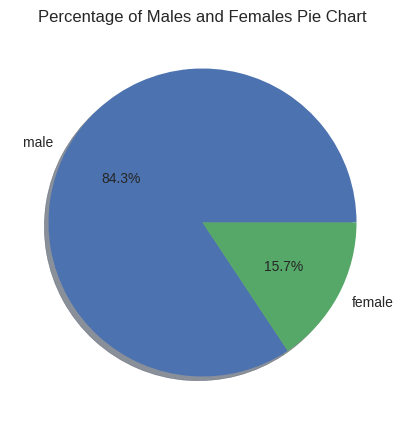

In [37]:
male= [x for x in data['Gender'] if str(x)== 'male']
female= [x for x in data['Gender'] if str(x)=='female']
d=[len(male),len(female)]
labels = ['male','female']

fig, ax1 = plt.subplots(figsize = (5,5))
ax1.pie(d, labels= labels,autopct='%1.1f%%',shadow = True)
plt.title('Percentage of Males and Females Pie Chart')
plt.savefig('/content/drive/MyDrive/files/graphs_hello/pie.png', dpi=80)
plt.show()

#### e. Histogram of CGPA for Male Students
A histogram is created to display the distribution of CGPA for male students. The CGPA values are divided into intervals (2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0).


<function matplotlib.pyplot.show(close=None, block=None)>

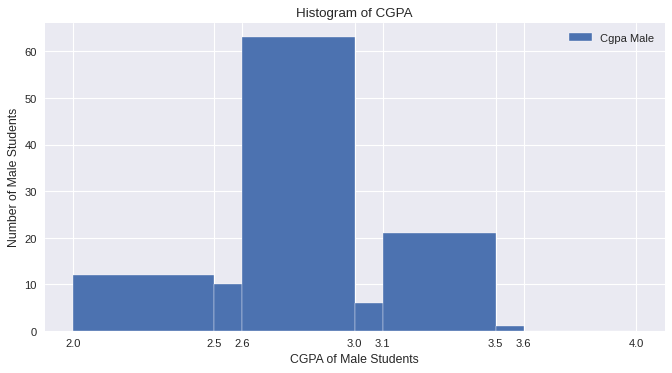

In [38]:
arr =[]
i=0
for x in data['Gender']:
  if x == 'male':
    arr.append(data['CGPA'][i])
  i+=1

bin=[2.0,2.5,2.6,3.0,3.1,3.5,3.6,4.0]
plt.figure(figsize=(10,5),dpi=80)
plt.hist(arr,bins=bin,edgecolor='w')
plt.xticks(bin)
plt.xlabel("CGPA of Male Students")
plt.ylabel("Number of Male Students")
plt.title("Histogram of CGPA")
plt.legend(labels=['Cgpa Male'])
plt.savefig('/content/drive/MyDrive/files/graphs_hello/histogram.png', dpi=80, bbox_inches='tight')
plt.show

#### f. Scatter Plot of HSSC-1 Marks for Male and Female Students
A scatter plot is generated to compare the HSSC-1 marks (Higher Secondary School Certificate) of male and female students.


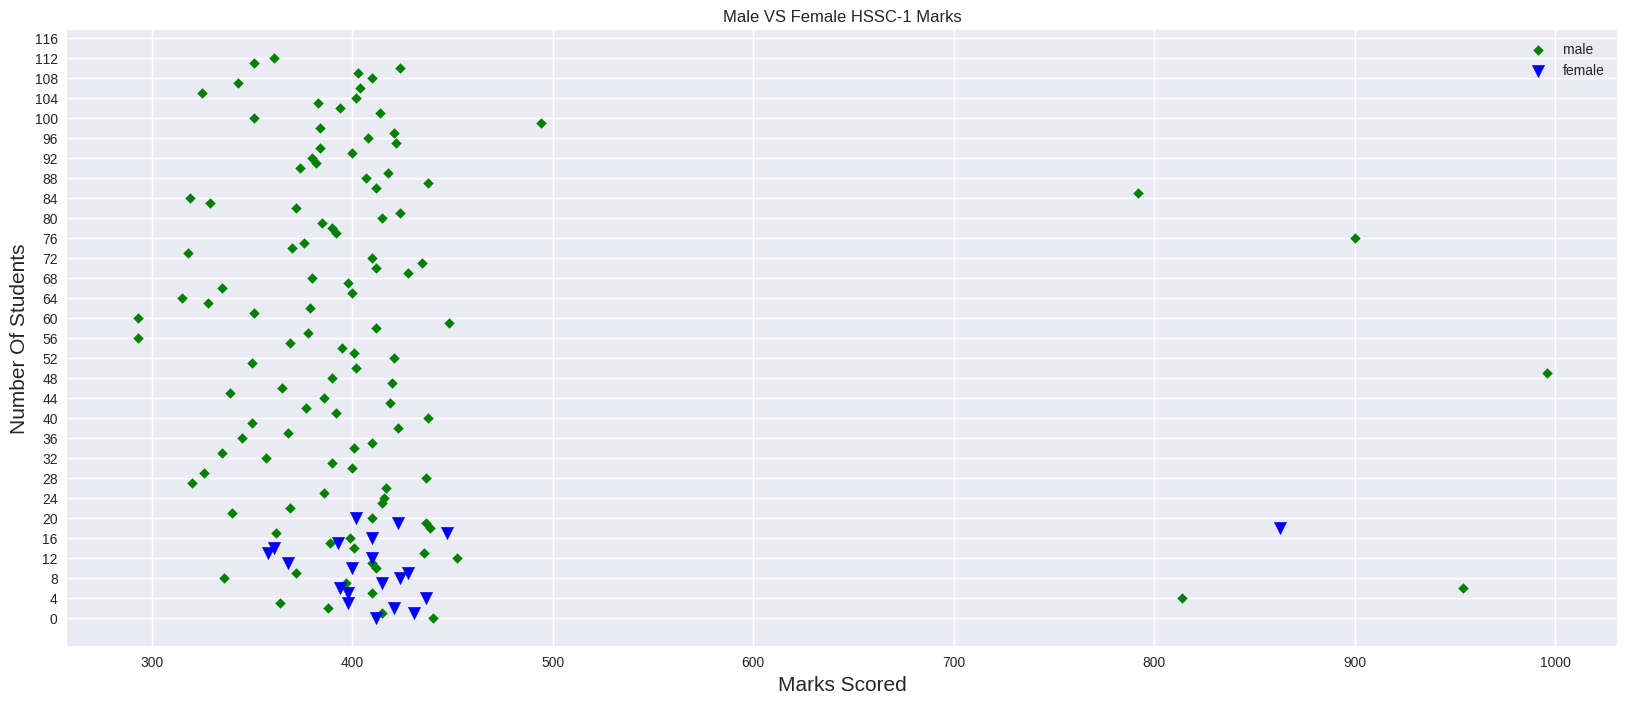

In [39]:
male_grades=[]
female_grades=[]
i=0
for x in data['Gender']:
  if x == 'male':
    male_grades.append(data['HSSC-1'][i])
  i+=1

j=0
for y in data['Gender']:
  if y == 'female':
    female_grades.append(data['HSSC-1'][j])
  j+=1

r_m= range(0,int(len(male_grades)))
r_f= range(0,int(len(female_grades)))
res_range= range(0,int(len(male_grades))+4,4)

fig, ax1 = plt.subplots(figsize = (20,8))
ax1.scatter(male_grades, r_m, marker='D',s=25,c='g')
ax1.scatter(female_grades, r_f, marker='v',s=80,c='b')
plt.yticks(res_range)

plt.xlabel('Marks Scored', fontsize=15)
plt.ylabel('Number Of Students', fontsize=15)
plt.title('Male VS Female HSSC-1 Marks')
plt.legend(["male","female"], loc = "best")
plt.savefig('/content/drive/MyDrive/files/graphs_hello/scatter.png', dpi=60, bbox_inches='tight')
plt.show()

#### g. Bar Chart of Favorite Colors for Male and Female Students
A bar chart is created to visualize the favorite colors of male and female students.


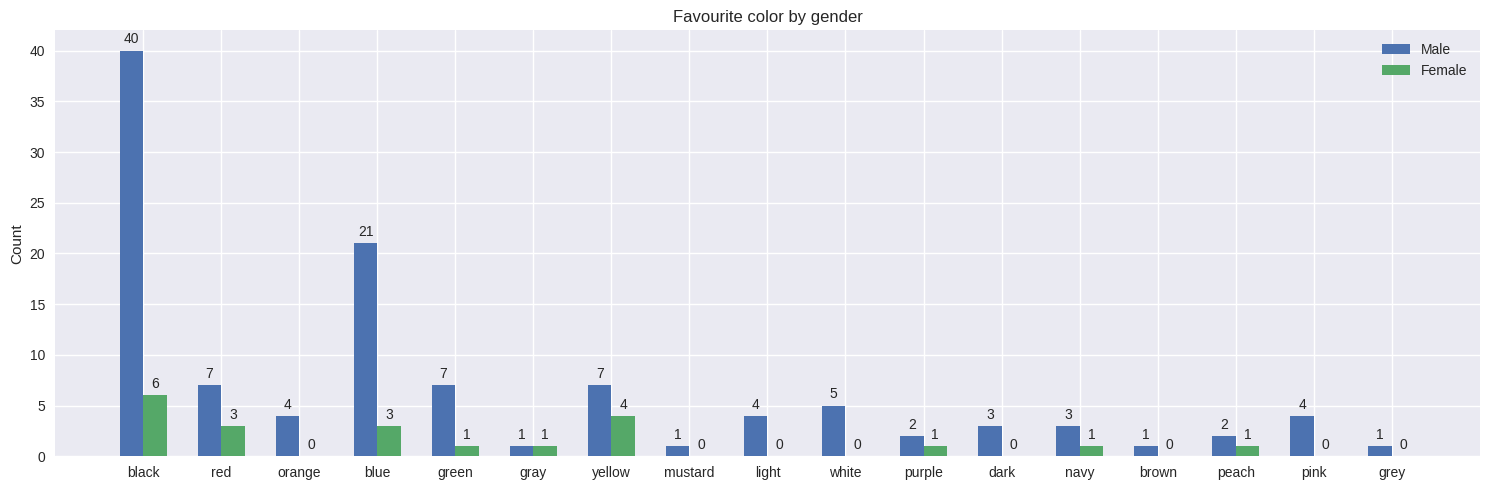

In [40]:
male_color=[]
female_color=[]
i=0
for x in data['Gender']:
  if x == 'male':
    male_color.append(data['FavoriteColor'][i])
  i+=1

j=0
for y in data['Gender']:
  if y == 'female':
    female_color.append(data['FavoriteColor'][j])
  j+=1

occurrence1 = {item: male_color.count(item) for item in male_color}
ar1=[]
for item in occurrence1:
  ar1.append(occurrence1.get(item))
occurrence2 = {item: female_color.count(item) for item in male_color}
ar2=[]
for item in occurrence2:
  ar2.append(occurrence2.get(item))

lab= male_color+female_color
lab= list(dict.fromkeys(lab))

x = np.arange(len(lab))
width = 0.3
fig, ax = plt.subplots(figsize=(15,5))
rects1 =ax.bar(x - width/2, ar1, width, label='Male')
rects2 =ax.bar(x + width/2, ar2, width, label='Female')
ax.set_ylabel('Count')
ax.set_title('Favourite color by gender')
ax.set_xticks(x,lab)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/files/graphs_hello/bar.png', dpi=80, bbox_inches='tight')
plt.show()

#### h. Line Chart of Birth Months of Students
A line chart is plotted to represent the birth months of students.


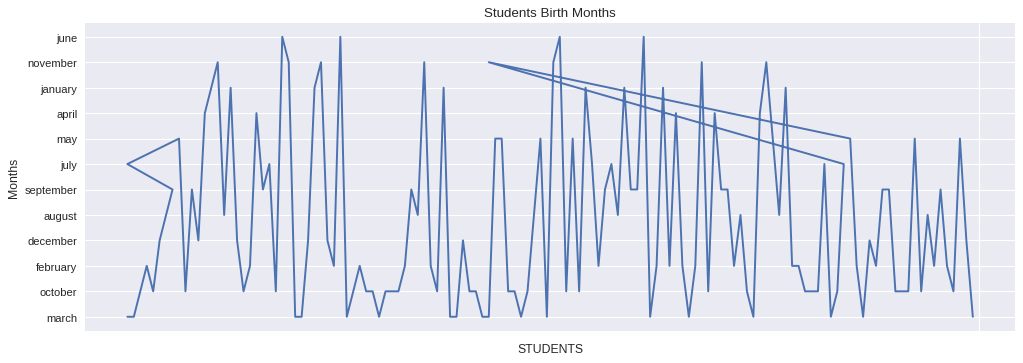

In [41]:
stu_names=list(data['Name'])
mon_names=list(data['BirthMonth'])

from calendar import month_name
month_lookup = list(month_name)
month_lookup=[x.lower() for x in month_lookup]
mon_sorted= sorted(mon_names, key=month_lookup.index)
mon_sorted = list(dict.fromkeys(mon_sorted))

plt.figure(figsize=(15,5),dpi=80)
plt.plot(stu_names,mon_names)
plt.yticks(mon_sorted)
plt.xticks('')
plt.ylabel("Months")
plt.xlabel("STUDENTS")
plt.title("Students Birth Months")
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/files/graphs_hello/line.png', dpi=80, bbox_inches='tight')
plt.show()

#### i. Correlation Matrix and Heatmap of HSSC-1 and HSSC-2 Marks
A correlation matrix is computed between HSSC-1 and HSSC-2 marks, and a heatmap is generated to visualize the correlation.


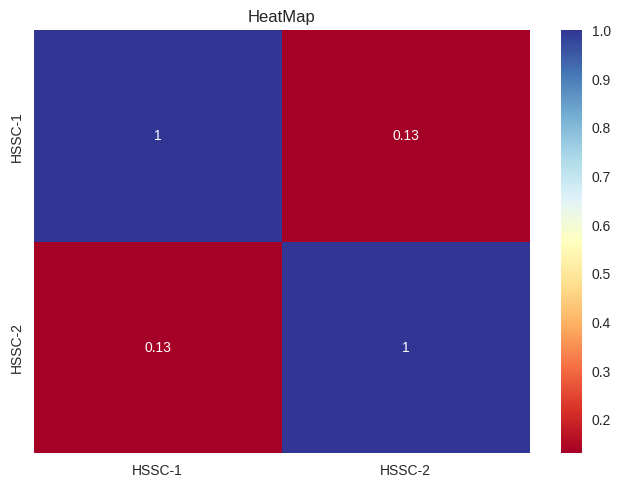

In [42]:
data['HSSC-1'].corr(data['HSSC-2'])
data['HSSC-1'].values

data2 = data.filter(['HSSC-1','HSSC-2'], axis=1)
data2.corr()

dataplot = sns.heatmap(data2.corr(), cmap="RdYlBu", annot=True)
plt.title("HeatMap")
plt.savefig('/content/drive/MyDrive/files/graphs_hello/heat.png', dpi=80, bbox_inches='tight')
plt.show()


#### j. Additional Insights
Some potential additional insights that can be derived from the dataset are mentioned, along with an example insight related to male vs. female weights, which is plotted using a scatter plot.

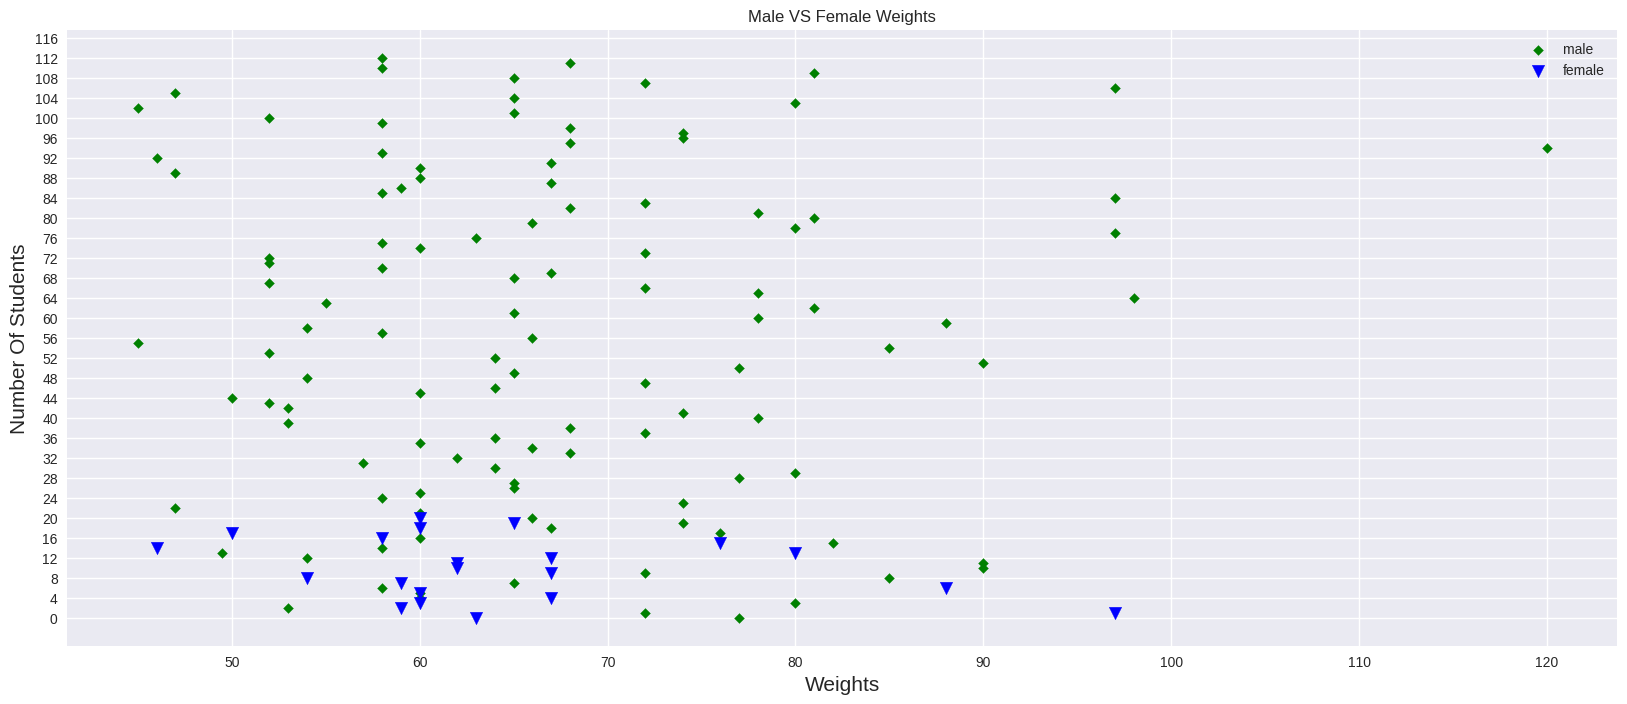

In [43]:
male_w=[]
female_w=[]

i=0
for x in data['Gender']:
  if x == 'male':
    male_w.append(data['Weight'][i])
  i+=1

j=0
for y in data['Gender']:
  if y == 'female':
    female_w.append(data['Weight'][j])
  j+=1

r_m= range(0,int(len(male_w)))
r_f= range(0,int(len(female_w)))
res_range= range(0,int(len(male_w))+4,4)

fig, ax1 = plt.subplots(figsize = (20,8))
ax1.scatter(male_w, r_m, marker='D',s=25,c='g')
ax1.scatter(female_w, r_f, marker='v',s=80,c='b')
plt.yticks(res_range)

plt.xlabel('Weights', fontsize=15)
plt.ylabel('Number Of Students', fontsize=15)
plt.title('Male VS Female Weights')
plt.legend(["male","female"], loc = "best")
plt.savefig('/content/drive/MyDrive/files/graphs_hello/scatter_weight.png', dpi=60, bbox_inches='tight')
plt.show()